# DS100218 Midterm Project
<img style="float: left;" src="https://upload.wikimedia.org/wikipedia/commons/c/ca/Walmart_logo.svg"> 
\\
###### Author: Alex Douglas

* Load Data
* Data Preparation
* Exploratory Analysis
* Pre-Processing
* Feature Selection / Engineering
* Regression Techniques
* Presentation

<img style="float: left;" src="https://icdn3.digitaltrends.com/image/walmart-cyber-monday-720x720.jpg?ver=1.jpg">

## Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine
import datetime
from plotnine import *
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df2 = pd.read_csv('./Datasets/Walmart_Sales_Forecasting.csv')
df3 = pd.read_csv('./Datasets/features.csv')
df = pd.merge(df2[['Store', 'Date', 'Dept', 'Weekly_Sales']], 
              df3, 
              on=['Store', 'Date']
             )

## Data Preparation

In [3]:
# To maximize data processing potential, I have removed NA values by the following criteria:
# NA formatting CPI, Fuel_Price, Unemployment data as mean value
# NA formatting MarkDown1-4 as value = 0
for col in ['CPI','Fuel_Price','Unemployment']:
    df[col] = df[col].fillna(value=df[col].mean())
for col in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4']:
    df[col] = df[col].fillna(0)

In [4]:
# Convert table 'Date' to Date format
df['Date'] = pd.to_datetime(df['Date'])
df['Week_of_Year'] = df['Date'].dt.weekofyear.astype(str)
df['Year'] = df['Date'].dt.year.astype(str)

## Exploratory Data Analysis

In [6]:
df.describe(include='all')

,Store,Date,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_of_Year,Year
count,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,151432.000000,421570.000000,421570.000000,421570,421570,421570
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,52,3
top,NaN,2011-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,7,2011
freq,NaN,3027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391909,8929,153453
first,NaN,2010-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,NaN,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,4628.975079,171.201947,7.960289,NaN,NaN,NaN
std,12.785297,NaN,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,5962.887455,39.159276,1.863296,NaN,NaN,NaN
min,1.000000,NaN,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,135.160000,126.064000,3.879000,NaN,NaN,NaN
25%,11.000000,NaN,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,1878.440000,132.022667,6.891000,NaN,NaN,NaN


In [50]:
df.tail()

,Store,Date,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_of_Year,Year,Estimated_Weekly_Sales_LinReg,Estimated_Weekly_Sales_Lasso
421565,45,2012-10-26,93,2487.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,43,2012,22536.346372,22611.418445
421566,45,2012-10-26,94,5203.31,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,43,2012,29173.873647,29243.716467
421567,45,2012-10-26,95,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,43,2012,66047.510770,66119.763384
421568,45,2012-10-26,97,6817.48,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,43,2012,10293.502019,10489.040075
421569,45,2012-10-26,98,1076.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,43,2012,2482.091100,2678.030042


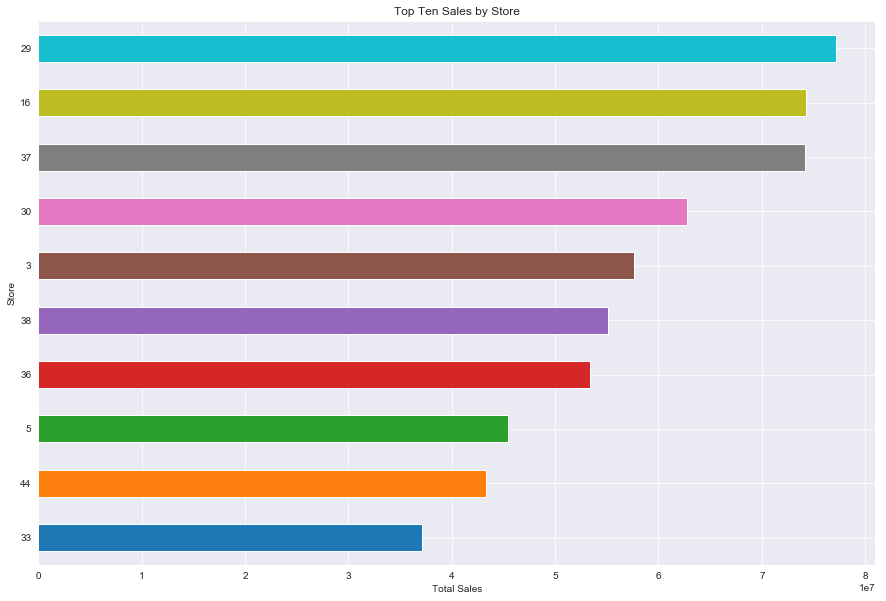

In [7]:
plt.title('Top Ten Sales by Store')
plt.xlabel('Total Sales')
plt.ylabel('Store')
df.groupby('Store')['Weekly_Sales'].sum().sort_values().head(10).plot(kind='barh',figsize=(15,10))

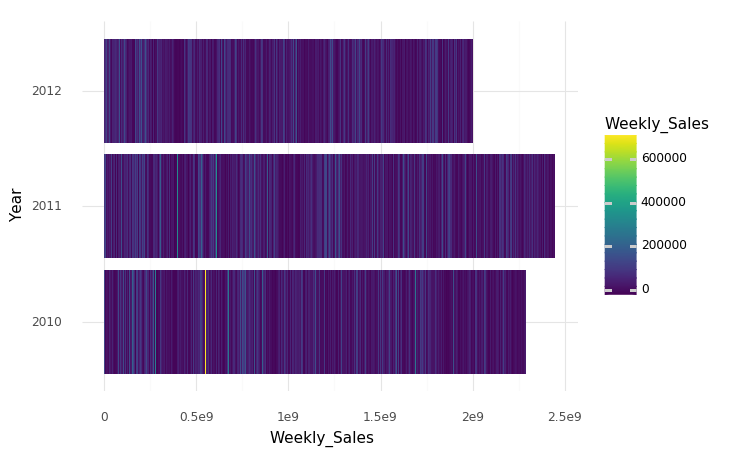

<ggplot: (7542073022)>

In [8]:
(
ggplot(df, 
       aes(x='Year', y='Weekly_Sales', fill='Weekly_Sales')
      ) 
 + geom_bar(stat='identity')
 + theme_minimal() 
 + coord_flip()
)

# x , y = df.Year, df.Weekly_Sales.sum()
# # print(np.corrcoef(x,y))
# plt.bar(x,y)

In [31]:
# seaborn plots

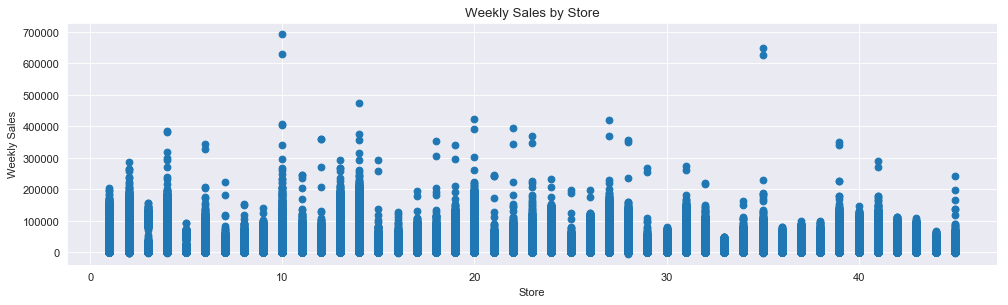

In [9]:
x , y = df.Store, df.Weekly_Sales
# print(np.corrcoef(x,y))
plt.figure(figsize=(15, 4), dpi=80)
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)

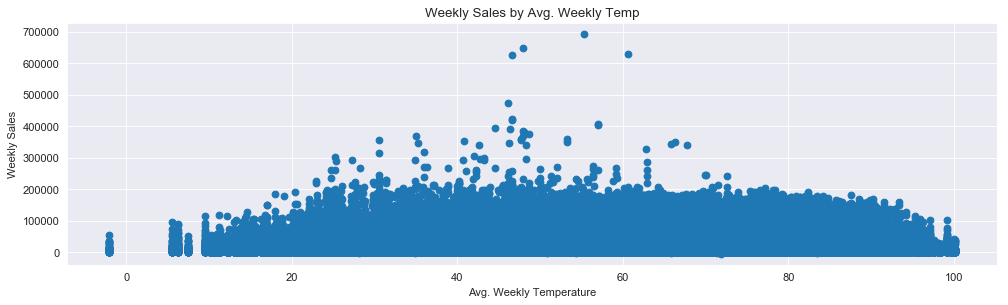

In [10]:
x , y = df.Temperature, df.Weekly_Sales
# print(np.corrcoef(x,y))
plt.figure(figsize=(15, 4), dpi=80)
plt.title('Weekly Sales by Avg. Weekly Temp')
plt.xlabel('Avg. Weekly Temperature')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)

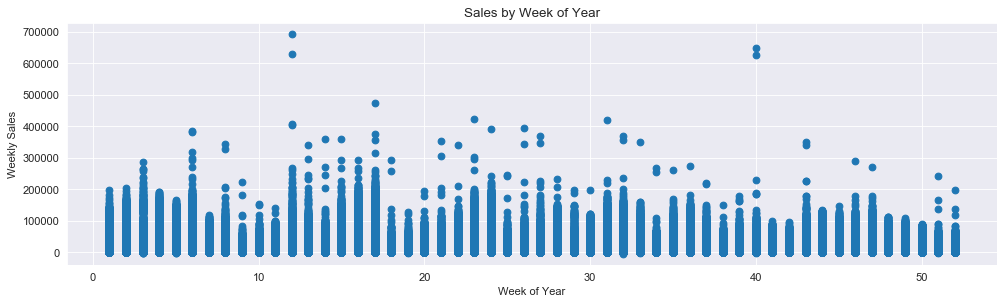

In [52]:
x , y = df.Week_of_Year.astype(int).sort_values(), df.Weekly_Sales
# print(np.corrcoef(x,y))
plt.figure(figsize=(15, 4), dpi=80)
plt.title('Sales by Week of Year')
plt.xlabel('Week of Year')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)

## Preprocessing

Create Dummy Variables to convert numerical values into categorical variables. This will help eliminate bias whereas if Weekly Sales in Store 14 > Store 45, this model.predict won't show Store 46 > Store 13.

Final step is to merge categorical and numerical data into dataframe for our model.


#### My first model attemped to include all variables for my data model:

In [46]:
for col in ['Store', 'Dept']:
    df[col] = df[col].astype(str) #Make nonumeric
X_dummies = pd.get_dummies(df[['Store','Dept','Week_of_Year','Year']],
                   drop_first=True
                  )
X_numeric = df[['Temperature','IsHoliday','CPI','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4']]
X = pd.concat([X_numeric,X_dummies], axis=1)

#### After playing around with multiple variables, I removed Fuel Price, Unemployment, and MarkDown variables to reduce number of variables and increase model performance.

In [13]:
for col in ['Store', 'Dept']:
    df[col] = df[col].astype(str) #Make nonumeric
X_dummies = pd.get_dummies(df[['Store','Dept','Week_of_Year','Year']],
                   drop_first=True
                  )
X_numeric = df[['Temperature','IsHoliday','CPI']]
X = pd.concat([X_numeric,X_dummies], axis=1)

y = df['Weekly_Sales']

# Lasso Regression - performance
# Training r^2: 0.661477552582582
# Testing r^2: 0.6672055094035932
# Training MSE: 13215.0873722163
# Testing MSE: 13098.334674633541
# Best alpha: 0.013115074218362945
 
# ==================================================
 
# Linear Regression - Model Coefficients
# Training R^2 model score: 0.6616196131529515
# Testing R^2 model score: 0.6673232102745661
# Training MSE: 13212.314232855155
# Testing MSE: 13096.018197376829

# Feature Selection / Engineering

In [48]:
# We are going to be utilizing a Linear Regression and LassoCV regression 
    # to determine which best, most accurately models our data 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Measure performance - overall performance & correlation between our model & data
linreg = LinearRegression() # Initialize a regression object
linreg.fit(X_train, y_train) # Fit the model
y_linreg_train = linreg.predict(X_train)
y_linreg_test = linreg.predict(X_test)
train_mse = np.sqrt(mean_squared_error(y_train, y_linreg_train))
test_mse = np.sqrt(mean_squared_error(y_test, y_linreg_test))


# LassoCV Regression
L1 = LassoCV(normalize = True)
L1.fit(X_train, y_train)

print('Lasso Regression - performance')
print('Training r^2:', L1.score(X_train, y_train))
print('Testing r^2:', L1.score(X_test, y_test))
print('Training MSE:', np.sqrt(mean_squared_error(y_train, L1.predict(X_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, L1.predict(X_test))))
print('Best alpha:', L1.alpha_)
print(' ')

print('=' * 50) # create line break

# Linear Regression
print(' ')
print('Linear Regression - Model Coefficients')
print('Training R^2 model score:', linreg.score(X_train,y_train))
print('Testing R^2 model score:', linreg.score(X_test,y_test))
print('Training MSE:', train_mse)
print('Testing MSE:', test_mse)
print(' ')

Lasso Regression - performance
Training r^2: 0.6647512166416782
Testing r^2: 0.6576675140922346
Training MSE: 13120.916710166055
Testing MSE: 13375.574855802151
Best alpha: 0.013078406155835528
 
 
Linear Regression - Model Coefficients
Training R^2 model score: 0.6648996373444278
Testing R^2 model score: 0.6578704125600452
Training MSE: 13118.011955007667
Testing MSE: 13371.610455692566
 


#### Our model coefficients help us eliminate extraneous variables - thus removing MarkDown1-4, Fuel Price, and Unemployment

In [47]:
print('Model feature coefficients:')
for feat, coeff in list(zip(X.columns, linreg.coef_)):
    print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))

Model feature coefficients:
Temperature Coefficient weight: 18.6013
IsHoliday Coefficient weight: 9851009333154.354
CPI Coefficient weight: 32.3055
Fuel_Price Coefficient weight: 7662.1141
MarkDown1 Coefficient weight: -3058.2701
MarkDown2 Coefficient weight: -4729.9496
MarkDown3 Coefficient weight: 8926.4003
MarkDown4 Coefficient weight: 8340.0559
Store_10 Coefficient weight: -10439.8369
Store_11 Coefficient weight: -13501.7771
Store_12 Coefficient weight: -5836.8995
Store_13 Coefficient weight: -3686.2991
Store_14 Coefficient weight: 1392.5705
Store_15 Coefficient weight: 5080.8176
Store_16 Coefficient weight: 8246.8596
Store_17 Coefficient weight: -11304.5567
Store_18 Coefficient weight: -4521.181
Store_19 Coefficient weight: 587.7958
Store_2 Coefficient weight: 3.9225
Store_20 Coefficient weight: -11402.5031
Store_21 Coefficient weight: -4991.3549
Store_22 Coefficient weight: 5624.7983
Store_23 Coefficient weight: -500.5903
Store_24 Coefficient weight: -11736.9999
Store_25 Coeffici

#### We determine that the two models performance are similar, thus we are going to utilize the Linear Regression.
Next, we use KFolds to build test samples to determine the accuracy & consistency of our regressions.

In [16]:
from sklearn.model_selection import KFold

In [40]:
kf = KFold(n_splits=15, shuffle=True)

In [41]:
# for train_index, test_index in kf.split(df):
#     print('train index:', train_index, len(train_index))
#     print('test index:', test_index, len(test_index))
#     print()

In [42]:
## First, we reintroduce the features that we ran in our model. 
X_feats = ['Store', 'Dept','Week_of_Year','Year','Temperature','IsHoliday','CPI']
y_feat =['Weekly_Sales']

In [43]:
rmse_df = pd.DataFrame(columns=['fold', 'train', 'test'])

for fold, (train_index, test_index) in enumerate(kf.split(df)):
    X_tr = df.loc[train_index, X_feats]
    y_tr = df.loc[train_index, y_feat]
    X_te = df.loc[test_index, X_feats]
    y_te = df.loc[test_index, y_feat]
    
    mod = LinearRegression()
    mod.fit(X_tr, y_tr)
    
    rmse_tr = np.sqrt(mean_squared_error(y_tr, mod.predict(X_tr)))
    rmse_te = np.sqrt(mean_squared_error(y_te, mod.predict(X_te)))
    
    tmp_df = pd.DataFrame({'fold': [fold], 'train': [rmse_tr], 'test': [rmse_te]})
    rmse_df = pd.concat([rmse_df, tmp_df], ignore_index=True)

#### Next we compare the training and testing variables to determine how close they are to one another...

In [44]:
print('Mean training rmse:', rmse_df['train'].mean())
print('Mean testing rmse:', rmse_df['test'].mean())

Mean training rmse: 22341.983674429088
Mean testing rmse: 22340.509782418183


### ...very close!

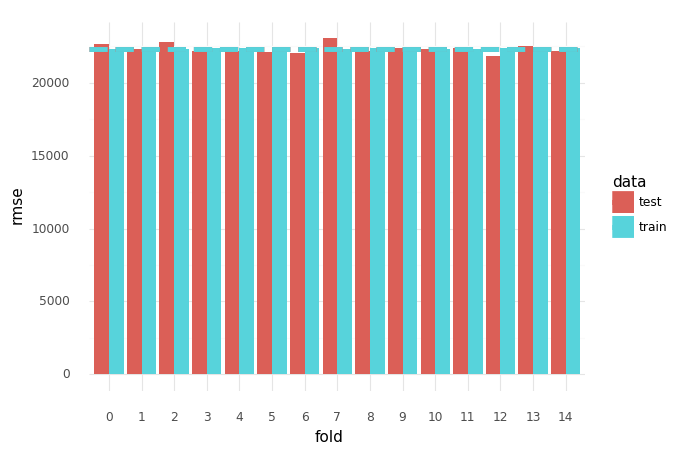

<ggplot: (-9223372029287963020)>

In [45]:
plt_df = (rmse_df.melt(id_vars=['fold'], var_name='data', value_name='rmse')
          .assign(mean = lambda d: d.groupby('data')['rmse'].transform(lambda x: x.mean()))
         )
(ggplot(plt_df, aes(x='fold', y='rmse', fill='data'))
 + geom_col(position='dodge')
 + geom_hline(aes(yintercept='mean', color='data'), linetype='--', size=2)
 + theme_minimal()
)

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Predictions for results: X axis - actuals, Y axis - estimated

In [25]:
## Linear Regression
# print('Model feature coefficients:')
# weight_dict = dict(zip(X.columns, linreg.coef_))
# for feat, coeff in list(zip(X.columns, linreg.coef_)):
#    print(feat, 'Coefficient weight: {}'.format(round(coeff, 4)))

In [29]:
# Add Linear Regression & Lasso Regression to DataFrame
df['Estimated_Weekly_Sales_LinReg'] = linreg.predict(X)
df['Estimated_Weekly_Sales_Lasso'] = L1.predict(X)

## Presentation

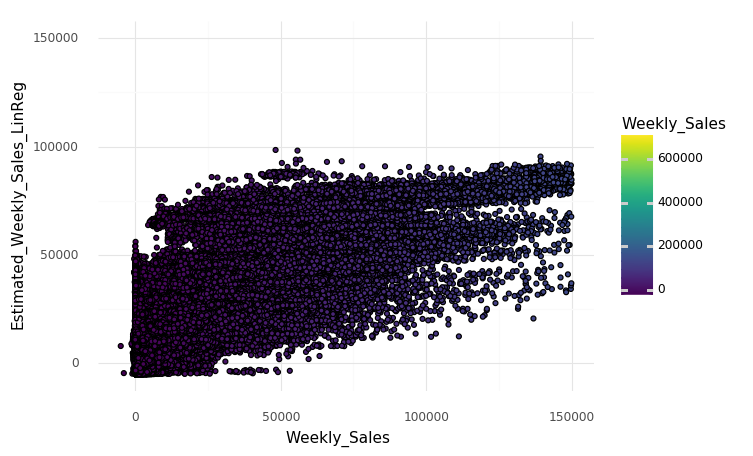

<ggplot: (-9223372029289791772)>

In [38]:

(
ggplot(df, 
       aes(x='Weekly_Sales', y='Estimated_Weekly_Sales_LinReg', fill='Weekly_Sales')
      )
 + geom_point(stat='identity')
#  + geom_smooth(method='lm')
 + theme_minimal() 
#  + coord_flip()
#  + coord_fixed()
#  + scale_size_continuous(range = (2,4)) 
    + xlim(-5000, 150000)
    + ylim(-5000, 150000)
)



# ggplot(data,aes(x.plot,y.plot))+stat_summary(fun.data=mean_cl_normal) + 
#   geom_smooth(method='lm',formula=y~x)
# x , y = df.Year, df.Weekly_Sales.sum()
# # print(np.corrcoef(x,y))
# plt.bar(x,y)